In [203]:
# Import necessary Python libraries
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import plotly.express as px

### Step 1:  EDA Process starts -  Inspecting the Dataframe for understanding provided data

In [204]:
df = pd.read_csv("E:/IIITB_Upgrad_AI_ML_Course/BikeLinearRegression/day.csv")
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [205]:
#Checking size of the data

df.shape

(730, 16)

In [206]:
#Checking data types of columns and null value analysis if any

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Observation : All data points are non-null and therefore do not require any imputation.

In [207]:
# Creating a copy of original dataframe for duplicate check
df_dup_check = df

# Checking for duplicates and dropping the entire duplicate row if any
df_dup_check.drop_duplicates(subset=None, inplace=True)
df_dup_check.shape

(730, 16)

##### Observation: The shape after running the drop duplicate command is same as the original dataframe. Hence we can conclude that there were not any duplicate values in the dataset.

In [208]:
#Checking the spread of numerical columns

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Performing numerical and categorical analysis on the data

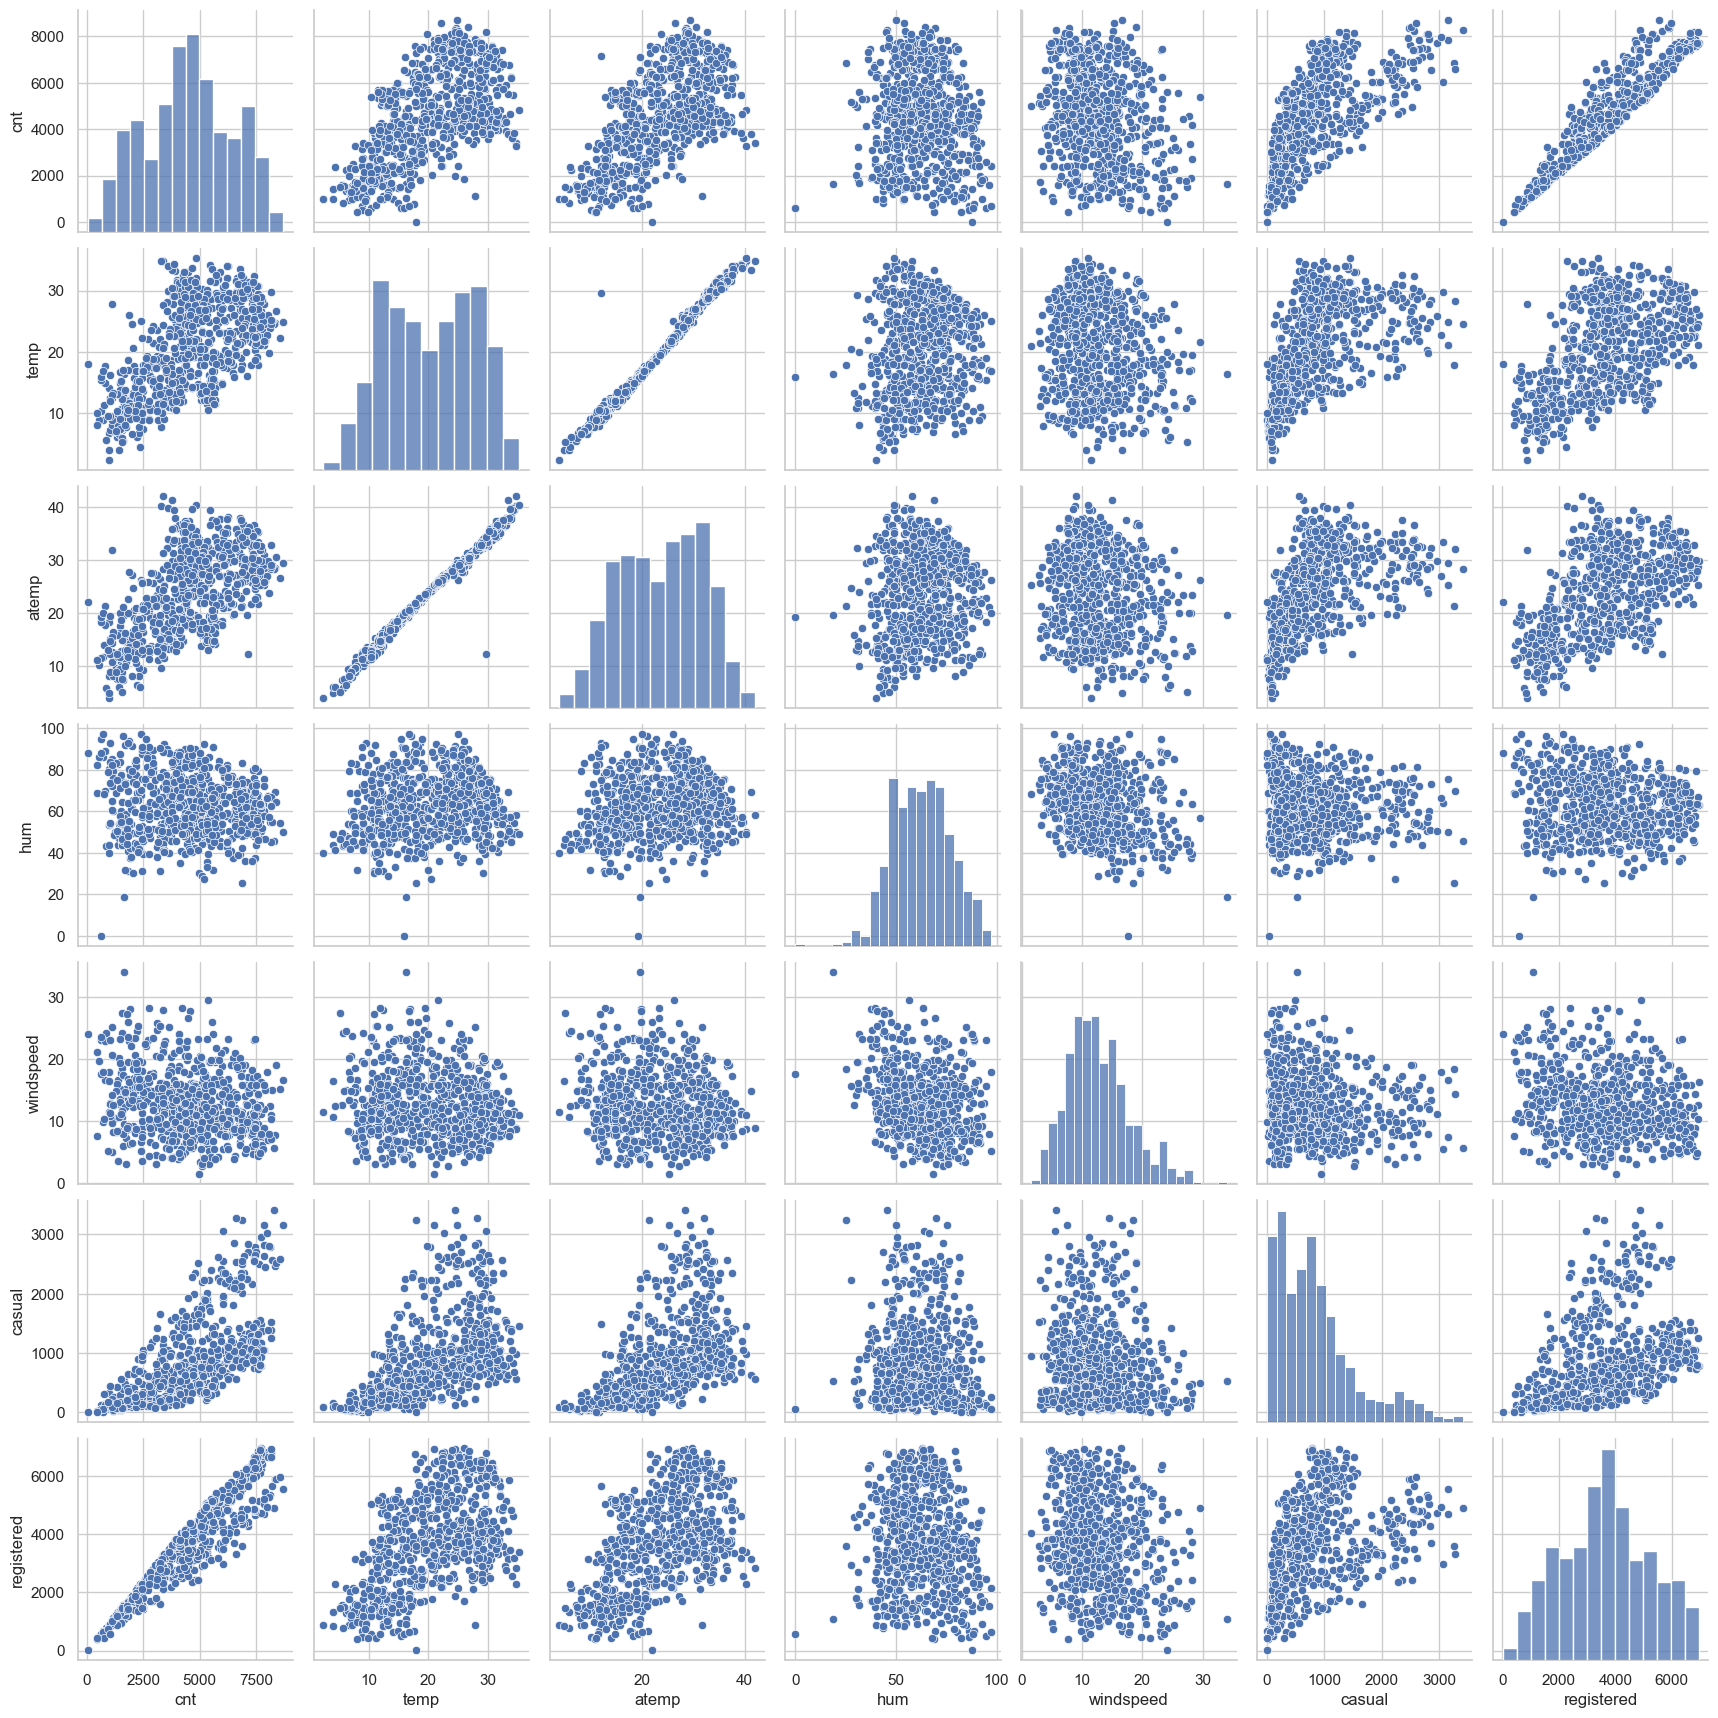

In [209]:
# Pair Plot for numerical variables

vars=["cnt","temp","atemp","hum","windspeed","casual","registered"]
sns.pairplot(df[vars])
plt.show()

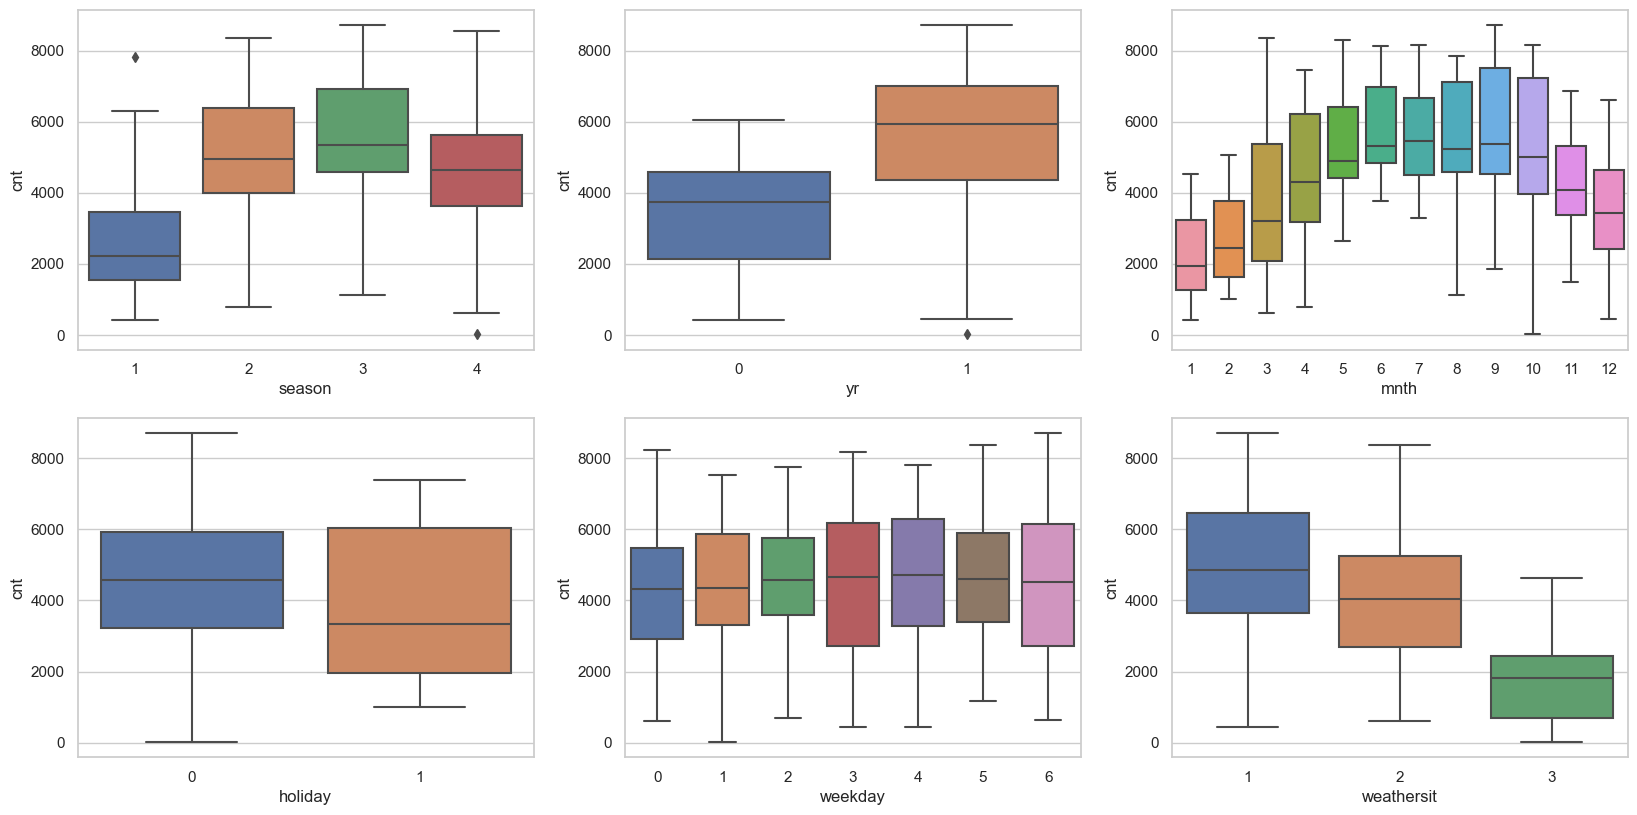

In [210]:
# Box Plots for categorical variables

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

#### Observations from EDA of categorical and numerical variables:
###### Season - We can notice a positive trend in the number of customers in 2 - Summer, 3 - Fall and 4 - Winter seasons
###### Year - The overall business shows a increasing trend in their user base year on year
###### Month - Similar to the season trend, there is a postive trend in the months of summer, fall and winter.
###### Holiday : On holidays, the users show a wider spread in the counts. On normal days, the users are more than holidays
###### Weekday : Weekdays or weekends do not show any specific trend here.
###### Weathersit : Clearer weathers show a postive trend in the number of bike users
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

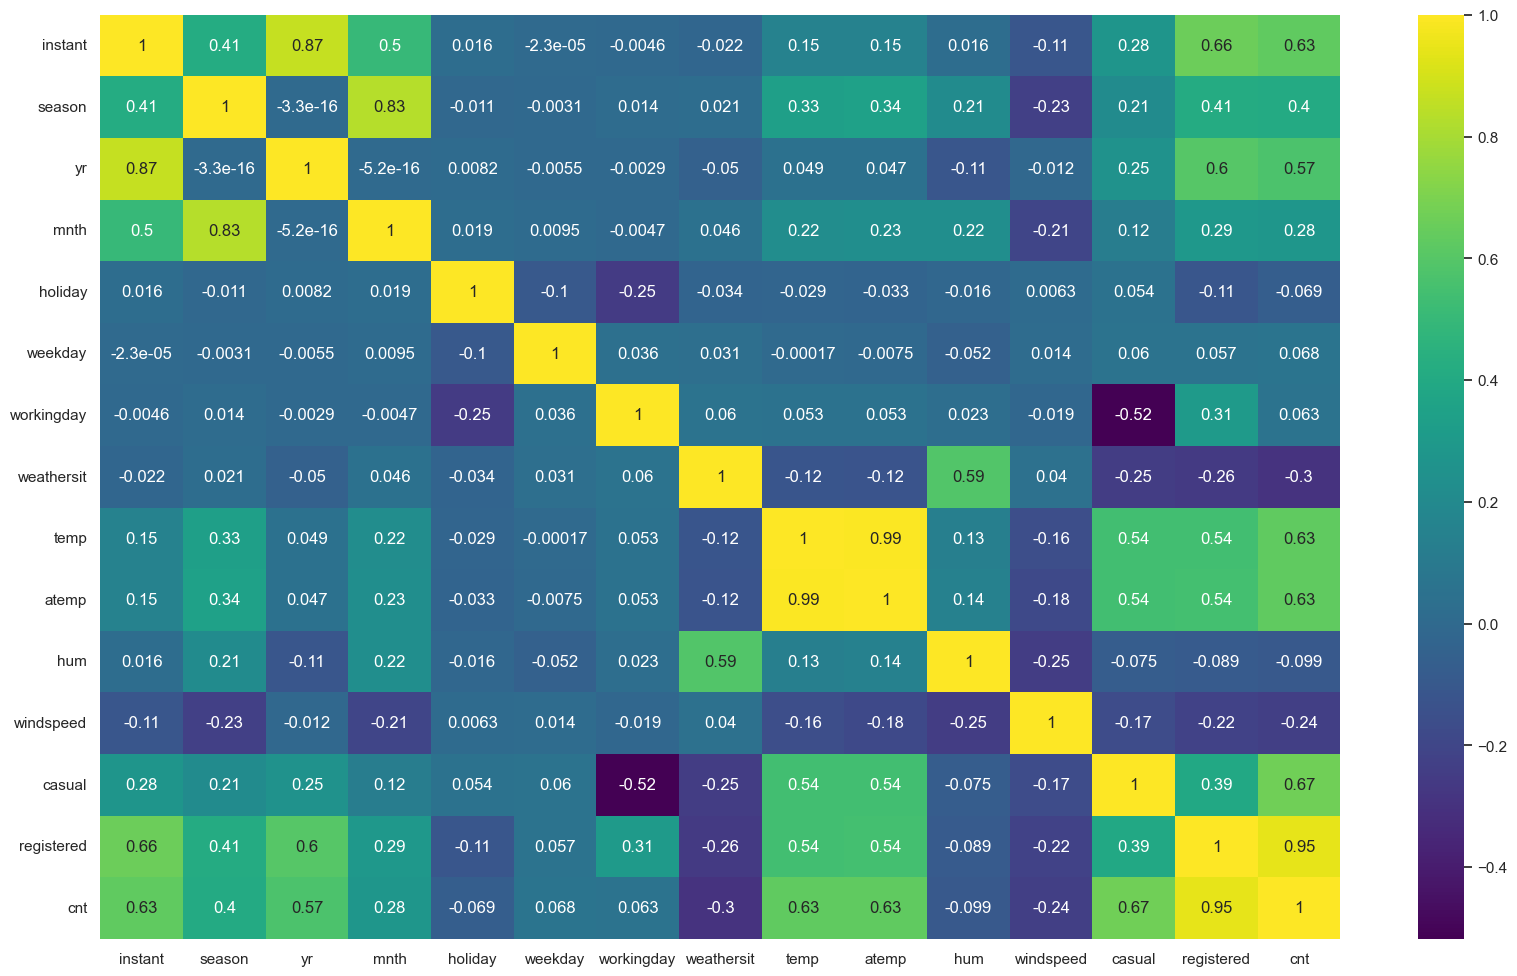

In [211]:
#Visualizing corelations among the variables using a heatmap

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

#### EDA Conlclusions:

###### Based on the high level analysis of the data and the data dictionary, the following variables can be removed for further analysis:
###### instant: It is only an index value
###### dteday: This has the date, Since we already have separate columns for 'year' & 'month' we could live without this column
###### casual : Count of bike booked by different categories of customers. 

###### From the pairplot as well as the correlation heatmap, we can concur that total bike rental value 'cnt = 'casual' + 'registered'. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns

In [212]:
#dropping the unwanted columns
df.drop(['instant','dteday','casual'],axis=1,inplace=True)
df.shape

(730, 13)

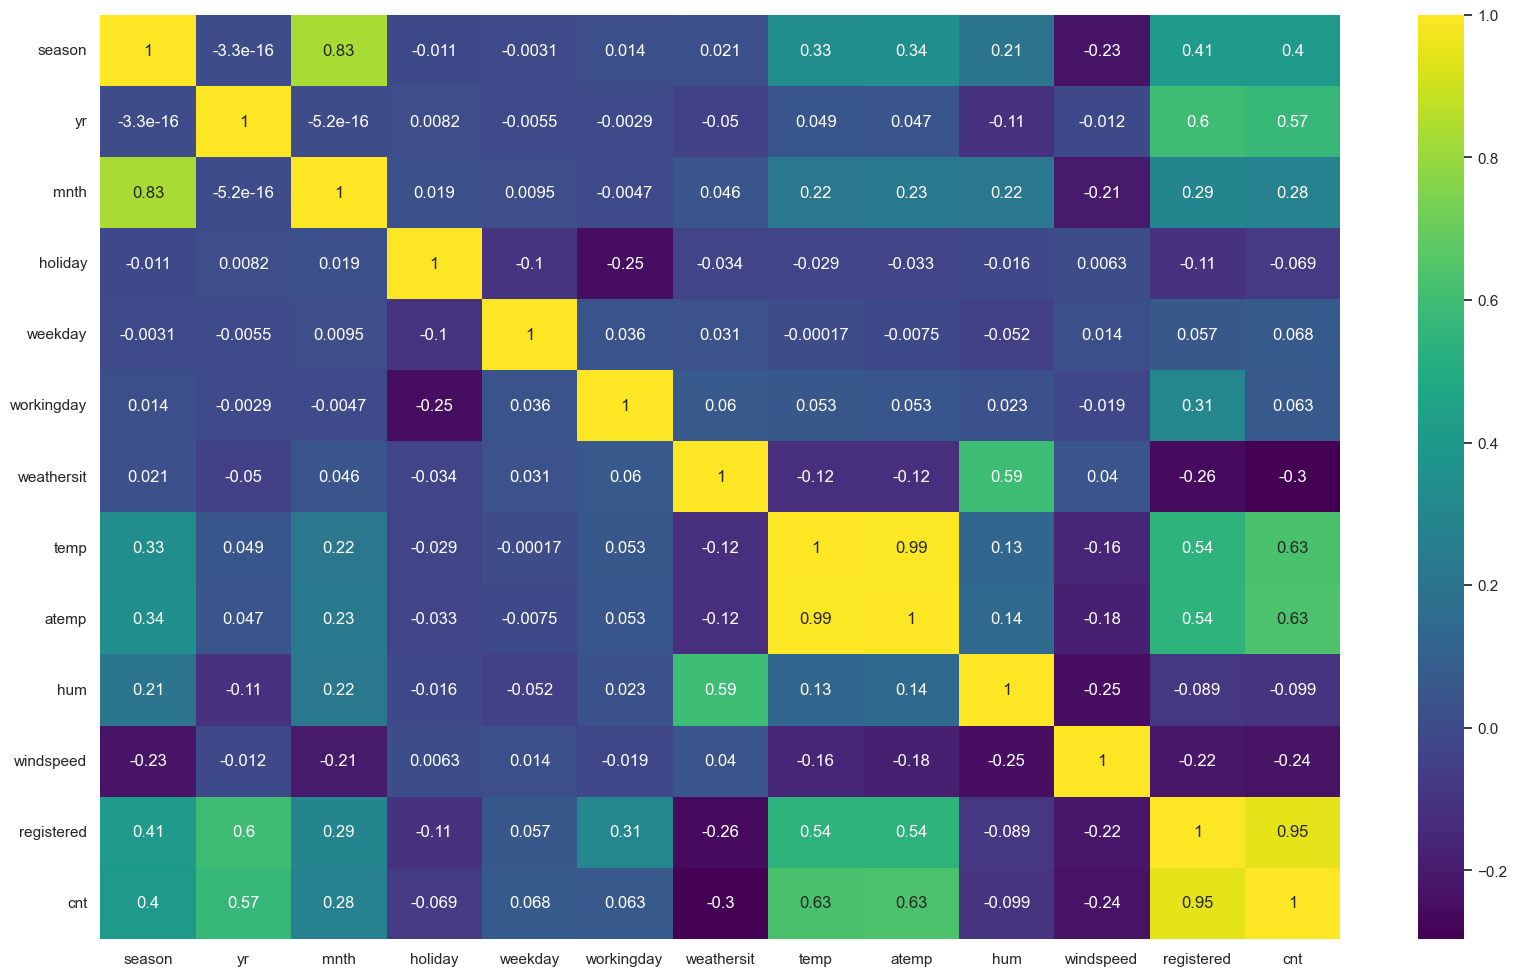

In [213]:
#Visualizing corelations among the variables using a heatmap

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

#### Observations:
###### Before continue further by satistical significance, our top 3 independent variables explaining changes of bike demands are :

##### 1st : temp/atemp/instant (+0.63)
##### 2nd : yr (+0.57)
##### 3rd : seasosn (+0.4)

### Step 2 : Data Preparation 

#### Convert categorical variables into dummy variables

#### List of categorical variables:

#### season : 1:spring, 2:summer, 3:fall, 4:winter
#### yr: 0: 2018, 1:2019
#### months : 1 to 12
#### holiday : 0 and 1
#### workingday : 0 and 1
#### weekday : 1 to 6
#### weathersit : 1, 2, 3 and 4


### Observation:
#### From the list of columns we do not need to convert yr, holiday and workingday since they are already in a binary format.

#### Converting season into dummy variables

In [214]:
# Imputing season column codes with their descriptions

df.season=df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [215]:
# Getting dummy variable for season variable

season=pd.get_dummies(df.season, drop_first=True) #Dropping the first dummy variable

In [216]:
# Checking dummy variable for season

season.describe()

,spring,summer,winter
count,730.000000,730.000000,730.000000
mean,0.246575,0.252055,0.243836
std,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [217]:
# Concatinating season to the original dataframe

df=pd.concat([df,season], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt,spring,summer,winter
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,654,985,1,0,0
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,670,801,1,0,0
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1229,1349,1,0,0
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1454,1562,1,0,0
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1518,1600,1,0,0


#### Converting weathersit into dummy variables

In [218]:
# checking weathersit column codes with their descriptions

df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

#### We do not have any data points for type 4 weather. We can create only two dummy variables.

In [219]:
# imputing weathersit column codes with their descriptions

df.weathersit=df.weathersit.map({1:'clear', 2:'misty', 3:'cloudy'})

In [220]:
# Checking dummy variable for weathersit

df.weathersit.value_counts()

clear     463
misty     246
cloudy     21
Name: weathersit, dtype: int64

In [221]:
# Getting dummy variable for weathersit variable

weathersit=pd.get_dummies(df.weathersit, drop_first=True) # Dropping the first dummy variable

In [222]:
# Checking dummy variable for weathersit

weathersit.describe()

,cloudy,misty
count,730.000000,730.000000
mean,0.028767,0.336986
std,0.167266,0.473004
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [223]:
# Concatinating weathersit to the original dataframe

df=pd.concat([df,weathersit], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt,spring,summer,winter,cloudy,misty
0,spring,0,1,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,654,985,1,0,0,0,1
1,spring,0,1,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,670,801,1,0,0,0,1
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1229,1349,1,0,0,0,0
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1454,1562,1,0,0,0,0
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1518,1600,1,0,0,0,0


##### Converting month into dummy variables

In [224]:
# imputing month column codes with their descriptions

df.mnth=df.mnth.map({1:'jan', 2:'feb', 3:'mar',4:'apr',5:'may',6:'jun',
                     7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [225]:
df.mnth.value_counts()

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

In [226]:
# Getting dummy variable for month variable

mnth=pd.get_dummies(df.mnth, drop_first=True) # Dropping the first dummy variable
mnth.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [227]:
# Concatinating mnth to the original dataframe

df=pd.concat([df,mnth], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,spring,0,jan,0,6,0,misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,jan,0,0,0,misty,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,jan,0,1,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,2,1,clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,jan,0,3,1,clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


#### Converting weekday into dummy variables

In [228]:
# imputing weekday column codes with their descriptions

df.weekday=df.weekday.map({0:'mon', 1:'tues', 2:'wed',3:'thurs',4:'fri',5:'sat',6:'sun'})

In [229]:
df.weekday.value_counts()

sun      105
mon      105
tues     105
wed      104
fri      104
sat      104
thurs    103
Name: weekday, dtype: int64

In [230]:
# Getting dummy variable for weekday variable

weekday=pd.get_dummies(df.weekday, drop_first=True)
weekday.head()
#We would not need all the 7 days here, we will drop off one day

,mon,sat,sun,thurs,tues,wed
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0


In [231]:
# Concatinating mnth to the original dataframe
df=pd.concat([df,weekday], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
0,spring,0,jan,0,sun,0,misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,0,0,0
1,spring,0,jan,0,mon,0,misty,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,0
2,spring,0,jan,0,tues,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,1,0
3,spring,0,jan,0,wed,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,1
4,spring,0,jan,0,thurs,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


#### We have now converted all dummy variables for all categorical variables in the data. Let's drop the converted categorical variables from the dataset.

In [232]:
# Dropping season and weathersit
df.drop(columns=['season','weathersit','mnth','weekday'], inplace=True)

#### We will convert registered users into categorical variables by performing binning.


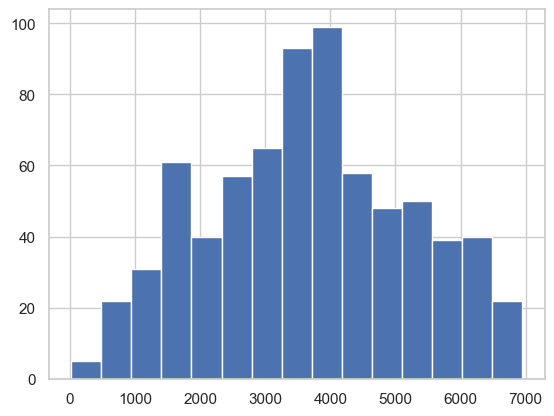

In [233]:
#Checking the data distribution of registered users

plt.hist(df.registered,bins=15)
plt.show()

In [234]:
#Checking quantiles of registered variables in 5 bins

df.registered.quantile([0.2, 0.4, 0.6, 0.8, 1])

0.2    2208.6
0.4    3310.2
0.6    3980.4
0.8    5116.4
1.0    6946.0
Name: registered, dtype: float64

In [235]:
# Defining the names of the bins

bins=['very low','low','medium','high','very high']
df['registered_bin']=pd.qcut(df['registered'],q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=bins)

In [236]:
# Checking the spread of data in the bins

df['registered_bin'].value_counts()

very low     146
low          146
medium       146
high         146
very high    146
Name: registered_bin, dtype: int64

In [237]:
# Getting dummy variable for registered_bin variable

registered_bin=pd.get_dummies(df.registered_bin, drop_first=True) #Dropping the first dummy variable
registered_bin.head()

,low,medium,high,very high
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [238]:
# Concatinating bins to the original dataframe

df=pd.concat([df,registered_bin], axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,registered,cnt,spring,...,sat,sun,thurs,tues,wed,registered_bin,low,medium,high,very high
0,0,0,0,14.110847,18.18125,80.5833,10.749882,654,985,1,...,0,1,0,0,0,very low,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,670,801,1,...,0,0,0,0,0,very low,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1229,1349,1,...,0,0,0,1,0,very low,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1454,1562,1,...,0,0,0,0,1,very low,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1518,1600,1,...,0,0,1,0,0,very low,0,0,0,0


##### Dropping other similar variables like date and instant from the dataset.

In [239]:
#Dropping atemp since we have a similar variable temp in the data

df.drop(columns=['atemp'], inplace=True)

#Dropping causal and registered since we can have only one target in the data

df.drop(columns=['registered','registered_bin'], inplace=True)

In [240]:
# Checking the fields in the dataset after data preparation

df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,mon,sat,sun,thurs,tues,wed,low,medium,high,very high
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Step 3: Splitting the data into test and train datasets

In [241]:
np.random.seed(0)

In [242]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=50)

In [243]:
# Checking the shape of train dataset

df_train.shape

(510, 33)

In [244]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,mon,sat,sun,thurs,tues,wed,low,medium,high,very high
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.705882,20.080994,62.577129,12.892991,4454.445098,0.245098,0.254902,0.250980,...,0.135294,0.143137,0.135294,0.139216,0.152941,0.149020,0.201961,0.198039,0.194118,0.200000
std,0.500179,0.151726,0.456092,7.367053,14.521347,5.172640,1941.858196,0.430568,0.436234,0.434003,...,0.342373,0.350557,0.342373,0.346511,0.360284,0.356457,0.401857,0.398913,0.395908,0.400393
min,0.000000,0.000000,0.000000,2.424346,0.000000,3.042081,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.393347,50.906250,9.169168,3068.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.107097,62.916650,12.187735,4509.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.031275,15.625589,5864.250000,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.371653,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [245]:
# Checking the shape of test  dataset

df_test.shape

(219, 33)

In [246]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,mon,sat,sun,thurs,tues,wed,low,medium,high,very high
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.538813,0.041096,0.630137,20.896856,63.176904,12.495316,4627.598174,0.251142,0.246575,0.223744,...,0.164384,0.141553,0.164384,0.146119,0.123288,0.123288,0.196347,0.205479,0.210046,0.200913
std,0.499633,0.198967,0.483873,7.819016,13.605548,5.239795,1924.239131,0.434663,0.432005,0.417707,...,0.371472,0.349389,0.371472,0.354034,0.329520,0.329520,0.398144,0.404977,0.408274,0.401601
min,0.000000,0.000000,0.000000,3.993043,30.217400,1.500244,801.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.260886,53.520800,8.750468,3362.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,21.388347,62.217400,11.958361,4590.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.487097,72.625000,15.639274,6168.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,27.833743,8555.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observation:
####  Based on the 70% - 30% split between train and test dataset we have 510 rows in train dataset and 219 in test dataset

#### Step 4: Resclaing the feature variables

#### From the data, we can see temp, hum and windspeed have larger and decimal values compared to others. We can normalized the numbers using the MinMax method and have all the numbers within 0 and 1 rang

In [247]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [248]:
# Applying fit_transform to normalize temp, atemp, hum and windspeed numerical columns

rescalevar=['temp','hum','windspeed','cnt']
df_train[rescalevar]=scaler.fit_transform(df_train[rescalevar])

In [249]:
# Checking minimum and maximum values of the normalized variables

df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,mon,sat,sun,thurs,tues,wed,low,medium,high,very high
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.705882,0.552680,0.644848,0.318203,0.509945,0.245098,0.254902,0.250980,...,0.135294,0.143137,0.135294,0.139216,0.152941,0.149020,0.201961,0.198039,0.194118,0.200000
std,0.500179,0.151726,0.456092,0.230600,0.149640,0.167086,0.223408,0.430568,0.436234,0.434003,...,0.342373,0.350557,0.342373,0.346511,0.360284,0.356457,0.401857,0.398913,0.395908,0.400393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.524581,0.197916,0.350523,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553497,0.648347,0.295422,0.516222,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.752576,0.406471,0.672141,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Step 5: Checking linearity and corealtion in the train dataset after rescaling and dummy field conversion

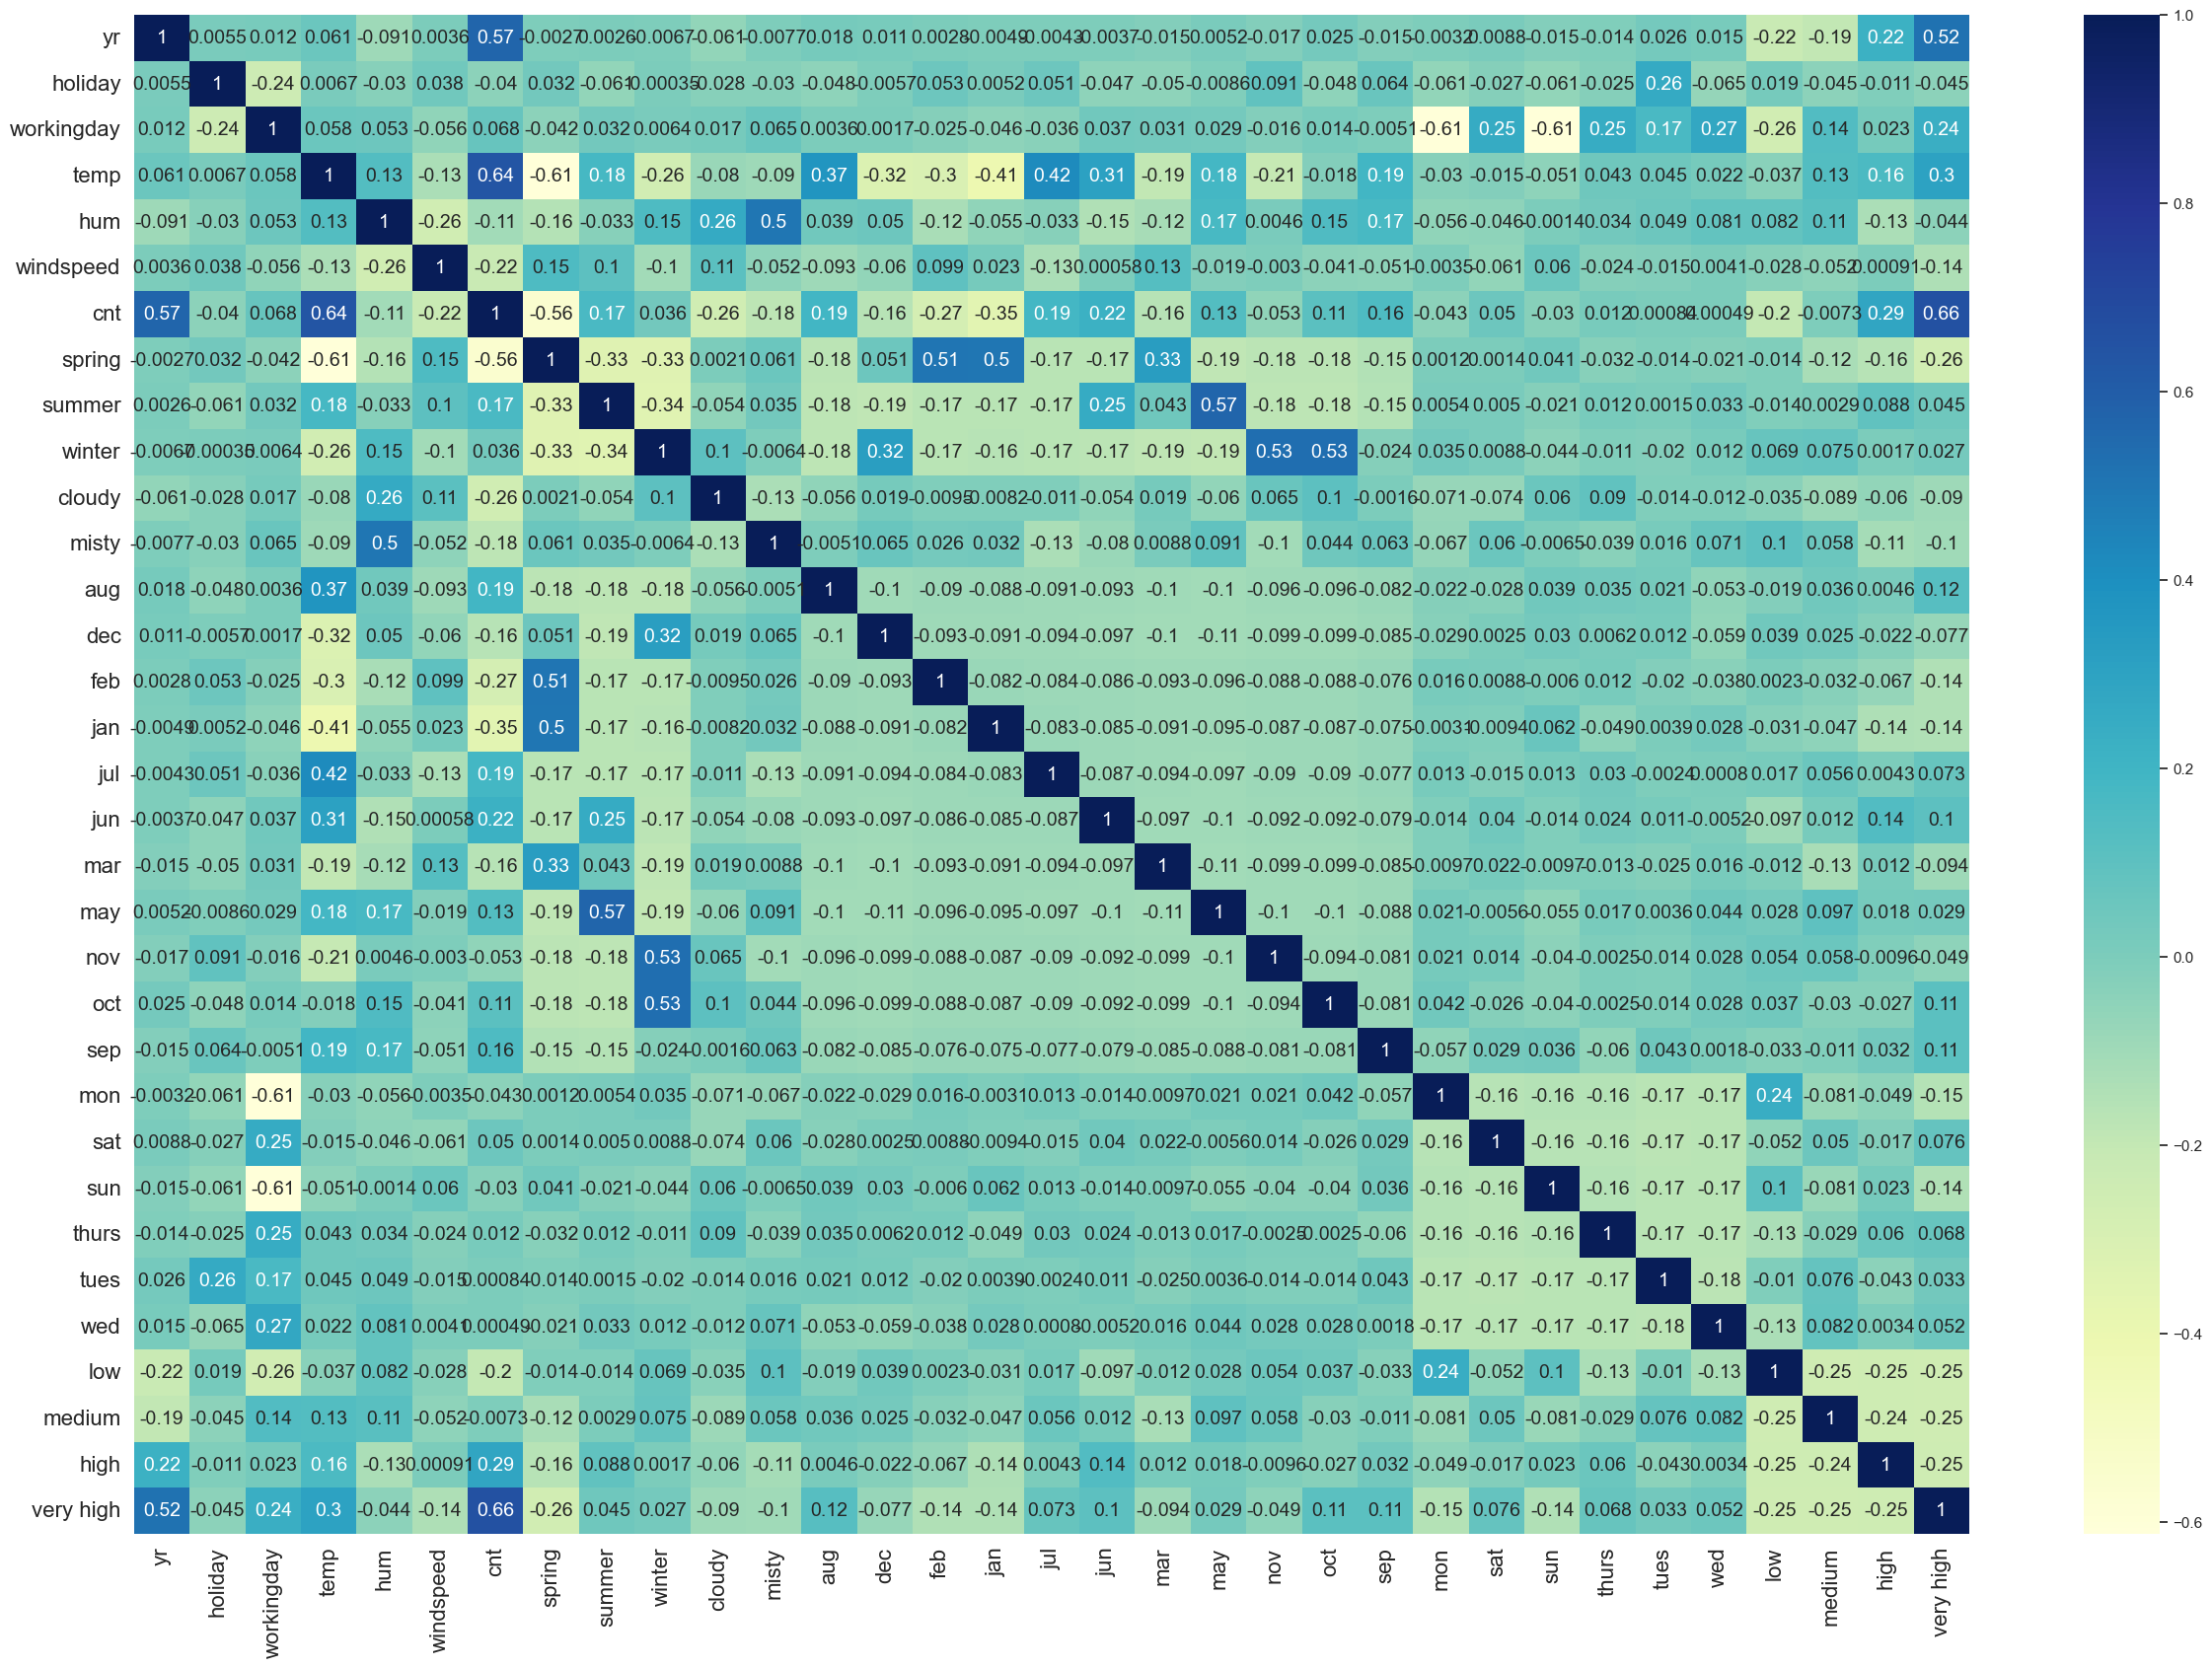

In [250]:
# Plotting a heatmap to check linearity

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",annot_kws={"fontsize":14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

#### Observation:
##### We can see that temperature has the most corelated to users than any other variable with 0.64 coefficient. We will proceed to try a regression model using temp as our predictor variable. We will not use registered bin variables yet and use them as an experimental addition

#### Step 6: Building our MLR model
##### Model 1: Using a single selected variable - temp

In [251]:
# import statmodels for our MLR

import statsmodels.api as sm

In [252]:
# Creating our feature and target variable datasets in y_train and X_train

y_train=df_train.pop('cnt')
X_train=df_train[:]

In [253]:
# Adding a constant to X_train

X_train_lm=sm.add_constant(X_train['temp'])

In [254]:
# Creating a LR object which we will use to fit the line

lr1 = sm.OLS(y_train, X_train_lm).fit()

In [255]:
#Checking the summary

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     354.0
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           2.56e-60
Time:                        22:30:57   Log-Likelihood:                 176.05
No. Observations:                 510   AIC:                            -348.1
Df Residuals:                     508   BIC:                            -339.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1668      0.020      8.443      0.000       0.128       0.206
temp           0.6209      0.033     18.815      0.000       0.556       0.686
==============================================================================
Omnibus:                        9.967   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.009
Skew:                           0.160   Prob(JB):                       0.0301
Kurtosis:                       2.523   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observation:We have R squared value of 0.41 with just the temperature variable. Meaning 41% of the variance is explained by temperature feature. P-value of the feature is also 0. So, temperature is statistically significant here.

#### Our line beta 0 is 0.6209 and beta 1 is 0.1668

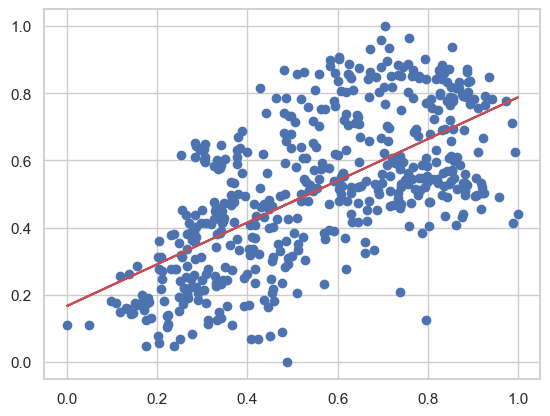

In [256]:
# Plotting our regression line through the target variable

plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.1668 + 0.6209*X_train_lm.iloc[:, 1], 'r')
plt.show()

#### Step 7 : Using RFE to select variables

In [257]:
# importing libraries for RFE
from sklearn.feature_selection import RFE

##### Since we would be using registered bins as an experimental feature addition, we will exclude those features for RFE selection

In [258]:
X_train.drop(columns=['low','medium','high','very high'], inplace=True)

In [259]:
# Creating a RFE object

lm = LinearRegression()
lm.fit(X_train, y_train)

#rfe = RFE(lm,10)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train) #fitting the object on our train datase

In [260]:
# Result of Recursive elimination of variables and their rankings

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('cloudy', True, 1),
 ('misty', True, 1),
 ('aug', False, 12),
 ('dec', True, 1),
 ('feb', False, 3),
 ('jan', True, 1),
 ('jul', False, 2),
 ('jun', False, 6),
 ('mar', False, 13),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', False, 14),
 ('sun', False, 7),
 ('thurs', False, 11),
 ('tues', False, 4),
 ('wed', False, 9)]

In [261]:
# Storing variables with significant weights in a variable

rfe_vars=X_train.columns[rfe.support_]
rfe_vars

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'cloudy', 'misty', 'dec', 'jan', 'nov', 'sep', 'mon'],
      dtype='object')

In [262]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'jul', 'jun', 'mar', 'may', 'oct', 'sat',
       'sun', 'thurs', 'tues', 'wed'],
      dtype='object')

##### Model 2: Building the model using RFE selected variables.

In [263]:
#Creating a train dataset using RFE variables

X_train_rfe=X_train[rfe_vars]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,cloudy,misty,dec,jan,nov,sep,mon
707,1,0,0.417140,0.933018,0.243629,0,0,1,0,1,1,0,0,0,1
172,0,0,0.865247,0.729068,0.274549,0,0,0,0,0,0,0,0,0,0
14,0,0,0.223565,0.513954,0.243603,1,0,0,0,1,0,1,0,0,0
204,0,0,0.989306,0.567625,0.267859,0,0,0,0,0,0,0,0,0,1
182,0,0,0.871664,0.458136,0.150755,0,0,0,0,0,0,0,0,0,0


In [264]:
# Adding a constant to X_train_rfe

X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,cloudy,misty,dec,jan,nov,sep,mon
707,1.0,1,0,0.417140,0.933018,0.243629,0,0,1,0,1,1,0,0,0,1
172,1.0,0,0,0.865247,0.729068,0.274549,0,0,0,0,0,0,0,0,0,0
14,1.0,0,0,0.223565,0.513954,0.243603,1,0,0,0,1,0,1,0,0,0
204,1.0,0,0,0.989306,0.567625,0.267859,0,0,0,0,0,0,0,0,0,1
182,1.0,0,0,0.871664,0.458136,0.150755,0,0,0,0,0,0,0,0,0,0


In [265]:
# Creating a LR object which we will use to fit the line.

lr2 = sm.OLS(y_train, X_train_rfe).fit()

In [266]:
#Checking the summary

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     189.9
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          6.02e-194
Time:                        22:30:58   Log-Likelihood:                 528.75
No. Observations:                 510   AIC:                            -1026.
Df Residuals:                     494   BIC:                            -957.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3373      0.035      9.568      0.000       0.268       0.407
yr             0.2311      0.008     29.460      0.000       0.216       0.247
holiday       -0.0656      0.026     -2.537      0.011      -0.116      -0.015
temp           0.4749      0.036     13.171      0.000       0.404       0.546
hum           -0.2074      0.037     -5.637      0.000      -0.280      -0.135
windspeed     -0.1904      0.025     -7.552      0.000      -0.240      -0.141
spring        -0.0608      0.021     -2.923      0.004      -0.102      -0.020
summer         0.0526      0.014      3.809      0.000       0.025       0.080
winter         0.1238      0.017      7.103      0.000       0.090       0.158
cloudy        -0.2114      0.025     -8.319      0.000      -0.261      -0.161
misty         -0.0455      0.011     -4.328      0.000      -0.066      -0.025
dec           -0.0494      0.017     -2.986      0.003      -0.082      -0.017
jan           -0.0378      0.018     -2.085      0.038      -0.073      -0.002
nov           -0.0557      0.018     -3.021      0.003      -0.092      -0.019
sep            0.0737      0.017      4.256      0.000       0.040       0.108
mon           -0.0396      0.011     -3.466      0.001      -0.062      -0.017
==============================================================================
Omnibus:                       80.949   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.385
Skew:                          -0.752   Prob(JB):                     1.72e-52
Kurtosis:                       5.992   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observation: From the p-values, we can see that we have variables with high p - values or variables which are not significant.

#### Calculating VIF for model 2

In [267]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.69
2,temp,17.15
4,windspeed,4.80
5,spring,4.20
7,winter,3.96
6,summer,2.47
9,misty,2.45
0,yr,1.98
12,nov,1.88
10,dec,1.61


##### Dropping insignificant variables and running the model.
##### As we can see hum have high p-value. Such variable(s) are insignificant and should be dropped.

##### We will start with dropping a single variable and recalculate its impact on other variables. Since hum has the highest p-value and and VIF>5. We will drop this variable

##### Model 3: Building the model after dropping hum.

In [270]:
# Dropping hum variable
X_train_rfe.drop(columns='hum', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr6 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.6
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          5.02e-187
Time:                        22:37:34   Log-Likelihood:                 506.73
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     496   BIC:                            -926.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2381      0.033      7.290      0.000       0.174       0.302
yr             0.2366      0.008     29.147      0.000       0.221       0.253
holiday       -0.0584      0.027     -2.169      0.031      -0.111      -0.006
temp           0.4231      0.036     11.719      0.000       0.352       0.494
windspeed     -0.1487      0.025     -5.919      0.000      -0.198      -0.099
spring        -0.0761      0.021     -3.543      0.000      -0.118      -0.034
summer         0.0426      0.014      2.983      0.003       0.015       0.071
winter         0.1019      0.018      5.729      0.000       0.067       0.137
cloudy        -0.2672      0.024    -11.287      0.000      -0.314      -0.221
misty         -0.0787      0.009     -9.010      0.000      -0.096      -0.062
dec           -0.0541      0.017     -3.153      0.002      -0.088      -0.020
jan           -0.0467      0.019     -2.491      0.013      -0.084      -0.010
nov           -0.0607      0.019     -3.169      0.002      -0.098      -0.023
sep            0.0604      0.018      3.398      0.001       0.025       0.095
==============================================================================
Omnibus:                       81.969   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.090
Skew:                          -0.767   Prob(JB):                     1.99e-52
Kurtosis:                       5.976   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Recalculating VIF for model 3

In [271]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.68
2,temp,3.94
6,winter,2.80
4,spring,2.58
0,yr,1.96
5,summer,1.95
11,nov,1.81
8,misty,1.58
9,dec,1.51
10,jan,1.48


##### Observation: We have all of our variables within VIF 5 and almost zero p-values coefficients.

##### At this stage, we have an adjusted R-sqaure values 0.84 which means our model explains 84% of the variance in the train data.
##### Let us try to manually add some significant variables to check if it improves our model.

In [272]:
#listing columns which have been used in lr6

X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'cloudy', 'misty', 'dec', 'jan', 'nov', 'sep'],
      dtype='object')